In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import gzip
import sys

# pick the seed for reproducability - change it to explore the effects of random variations
np.random.seed(1)
import random

In [4]:
with gzip.open('mnist.pkl.gz', 'rb') as mnist_pickle:   
    if sys.version_info.major > 2:
        MNIST = pickle.load(mnist_pickle, encoding='latin1')
    else:          
        MNIST = pickle.load(mnist_pickle)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01171875 0.0703125
 0.0703125  0.0703125  0.4921875  0.53125    0.68359375 0.1015625
 0.6484375  0.99609375 0.96484375 0.49609375 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1171875  0.140625
 0.3671875  0.6015625 ]
5


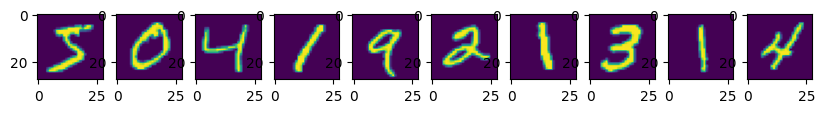

In [5]:
print(MNIST[0][0][0][130:180])  # [train][features][0][130:180]
print(MNIST[0][1][0])   # [train][labels][0]
features = MNIST[0][0].astype(np.float32) / 256.0
labels = MNIST[0][1]
fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(1,10,i+1)
    plt.imshow(features[i].reshape(28,28))
plt.show()

In [6]:
def train(positive_examples, negative_examples, num_iterations = 100):
    num_dims = positive_examples.shape[1]
    weights = np.zeros((num_dims,1)) # initialize weights
    
    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]
    
    report_frequency = 10
    
    for i in range(num_iterations):
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        z = np.dot(pos, weights)   
        if z < 0:
            weights = weights + pos.reshape(weights.shape)

        z  = np.dot(neg, weights)
        if z >= 0:
            weights = weights - neg.reshape(weights.shape)
            
        if i % report_frequency == 0:             
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)        
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            print("Iteration={}, pos correct={}, neg correct={}".format(i,pos_correct,neg_correct))

    return weights

In [7]:
# one-vs-all dateset

def set_mnist_pos_neg(positive_label):
    positive_indices = [i for i, j in enumerate(MNIST[0][1]) 
                          if j == positive_label]
    negative_indices = [i for i, j in enumerate(MNIST[0][1]) 
                          if j != positive_label]

    positive_images = MNIST[0][0][positive_indices]
    negative_images = MNIST[0][0][negative_indices]

    return positive_images, negative_images

In [ ]:
def accuracy(weights, test_x, test_labels):
    res = np.dot(np.c_[test_x,np.ones(len(test_x))],weights)
    return (res.reshape(test_labels.shape)*test_labels>=0).sum()/float(len(test_labels))


In [ ]:
"""
Now you need to:
Create 10 one-vs-all datasets for all digits
Train 10 perceptrons
Define classify function to perform digit classification

Measure the accuracy of classification and print confusion matrix
[Optional] Create improved classify function that performs the classification using one matrix multiplication.
"""

In [21]:
# Train 10 perceptrons

wts = []

for i in range(10):
    wts.append(train(pos[i], neg[i], 100))


Iteration=0, pos correct=0.0, neg correct=1.0
Iteration=10, pos correct=0.8980129764801298, neg correct=0.8812017395935031
Iteration=20, pos correct=0.7258718572587186, neg correct=0.9785213455223218
Iteration=30, pos correct=0.9752635847526359, neg correct=0.8202937782905831
Iteration=40, pos correct=0.9101784266017843, neg correct=0.9597275228543535
Iteration=50, pos correct=0.9854014598540146, neg correct=0.8323200497026715
Iteration=60, pos correct=0.9839821573398215, neg correct=0.8776293600781042
Iteration=70, pos correct=0.8856447688564477, neg correct=0.9855107837046241
Iteration=80, pos correct=0.8856447688564477, neg correct=0.9855107837046241
Iteration=90, pos correct=0.8856447688564477, neg correct=0.9855107837046241
Iteration=0, pos correct=0.0, neg correct=1.0
Iteration=10, pos correct=0.9774568510038746, neg correct=0.7693244889671044
Iteration=20, pos correct=0.9663613948573442, neg correct=0.9100897973918145
Iteration=30, pos correct=0.9772807326523424, neg correct=0.8

In [31]:
# Define classify function to perform digit classification

def classify(image, weights):
    scores = [np.dot(image, weight) for weight in weights]
    return np.argmax(scores)

classify( )

In [33]:
# Measure the accuracy of classification and print confusion matrix

correct = 0
confusion_matrix = np.zeros((10, 10))

for i, image in enumerate(features):
    predicted_digit = classify(image, wts)
    true_digit = labels[i]

    if predicted_digit == true_digit:
        correct += 1
    confusion_matrix[true_digit][predicted_digit] += 1

accuracy = correct / len(labels)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix)

Accuracy: 0.65712
Confusion Matrix:
[[3.580e+03 0.000e+00 5.200e+01 1.590e+02 3.000e+00 7.390e+02 2.800e+02
  3.200e+01 6.600e+01 2.100e+01]
 [0.000e+00 2.018e+03 2.870e+02 5.000e+00 3.000e+00 4.380e+02 6.000e+00
  0.000e+00 2.891e+03 3.000e+01]
 [4.400e+01 1.900e+01 3.394e+03 1.400e+02 1.300e+01 1.630e+02 2.300e+02
  1.410e+02 8.110e+02 1.300e+01]
 [2.600e+01 9.000e+00 1.430e+02 3.713e+03 1.000e+00 7.370e+02 3.300e+01
  4.500e+01 3.210e+02 7.300e+01]
 [7.000e+00 3.000e+00 4.000e+02 1.330e+02 2.001e+03 7.690e+02 2.070e+02
  6.700e+01 2.910e+02 9.810e+02]
 [3.100e+01 0.000e+00 2.900e+01 3.850e+02 1.600e+01 3.674e+03 9.900e+01
  7.000e+00 2.070e+02 5.800e+01]
 [2.400e+01 4.000e+00 8.500e+01 5.000e+00 3.100e+01 3.360e+02 4.339e+03
  4.200e+01 8.500e+01 0.000e+00]
 [2.000e+01 9.000e+00 1.740e+02 7.400e+01 5.900e+01 9.700e+01 6.000e+00
  3.092e+03 3.070e+02 1.337e+03]
 [4.000e+00 3.000e+00 9.300e+01 2.670e+02 1.000e+00 9.230e+02 4.700e+01
  1.600e+01 3.417e+03 7.100e+01]
 [1.300e+01 0.000e+

In [25]:
#[Optional] Create an improved classify function that performs the classification using one matrix multiplication:

def classify_improved(image, weights):
    scores = np.dot(image, np.array(weights).T) # np.array().T : transpose of the array
    return np.argmax(scores)